In [26]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential,load_model
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,
                                 rotation_range=.2,shear_range=.2,zoom_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [29]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Cotton_Dataset/train",
                                               target_size=(224,224),class_mode="categorical",batch_size=20,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Cotton_Dataset/test",
                                               target_size=(224,224),class_mode="categorical",batch_size=20,shuffle=True)

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [30]:
folder=glob("/content/drive/MyDrive/Cotton_Dataset/train/*")
folder

['/content/drive/MyDrive/Cotton_Dataset/train/fresh cotton leaf',
 '/content/drive/MyDrive/Cotton_Dataset/train/fresh cotton plant',
 '/content/drive/MyDrive/Cotton_Dataset/train/diseased cotton leaf',
 '/content/drive/MyDrive/Cotton_Dataset/train/diseased cotton plant']

In [31]:
IMAGE_SIZE=[224,224]

In [32]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

In [33]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
for layer in vgg16.layers:
  layer.trainable=False

In [35]:
x=Flatten()(vgg16.output)
prediction_vgg16=Dense(units=len(folder),activation="softmax")(x)
model_vgg16=Model(inputs=vgg16.input,outputs=prediction_vgg16)

In [36]:
model_vgg16.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
model_vgg16.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [38]:
transfer_vgg16=model_vgg16.fit_generator(training_set,validation_data=test_set,
                                         epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
98/98 [==============================] - 42s 428ms/step - loss: 1.0784 - accuracy: 0.6261 - val_loss: 0.3537 - val_accuracy: 0.8333
Epoch 2/20
98/98 [==============================] - 38s 387ms/step - loss: 0.2435 - accuracy: 0.8953 - val_loss: 0.1506 - val_accuracy: 0.9444
Epoch 3/20
98/98 [==============================] - 38s 389ms/step - loss: 0.1936 - accuracy: 0.9225 - val_loss: 0.2947 - val_accuracy: 0.8889
Epoch 4/20
98/98 [==============================] - 39s 394ms/step - loss: 0.1364 - accuracy: 0.9412 - val_loss: 0.1584 - val_accuracy: 0.9444
Epoch 5/20
98/98 [==============================] - 38s 389ms/step - loss: 0.1292 - accuracy: 0.9546 - val_loss: 0.1808 - val_accuracy: 0.9444
Epoch 6/20
98/98 [==============================] - 38s 387ms/step - loss: 0.0997 - accuracy: 0.9650 - val_loss: 0.1708 - val_accuracy: 0.9444
Epoch 7/20
98/98 [==============================] - 38s 389ms/step - loss: 0.0674 - accuracy: 0.9747 - val_loss: 0.1576 - val_accuracy: 0.9444

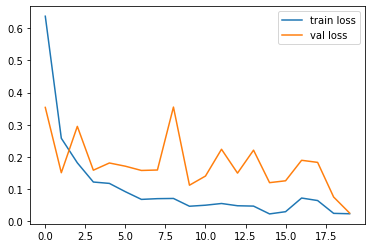

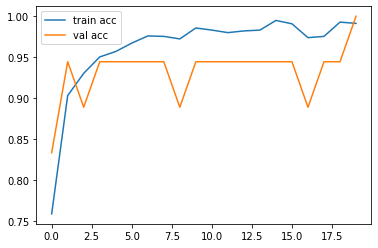

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
model_vgg16.save("model_tranfer_vgg16")

INFO:tensorflow:Assets written to: model_tranfer_vgg16/assets


In [42]:
model_transfer_vgg16=load_model("model_tranfer_vgg16")

In [43]:
def predict(image_path,model):
  img=image.load_img(image_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=x/255
  x=np.expand_dims(x,axis=0)
  pred=model.predict(x)
  pred=np.argmax(pred,axis=1)
  if pred==0:
    print("The leaf is diseased cotton leaf ")
  elif pred==1:
    print("The plant is diseased cotton plant")
  elif pred==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The Plant is fresh cotton plant")

In [46]:
predict("/content/drive/MyDrive/Cotton_Dataset/val/fresh cotton plant/dsd (443)_iaip.jpg",model_transfer_vgg16)

The Plant is fresh cotton plant
